In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [2]:
%cd /content/drive/MyDrive/BKM-tf/

/content/drive/MyDrive/BKM-tf


In [7]:
import numpy as np
import pandas as pd 
# from BHDVCS_tf import BHDVCStf
from BHDVCS_tf import TotalFLayer
from BHDVCS_tf import DvcsData
from BHDVCS_tf import cffs_from_globalModel
from BHDVCS_tf import F2VsPhi
from BHDVCS_tf import BHDVCStf
import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt

import sys
from scipy.stats import chisquare
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("BKM_pseudodata.csv", dtype=np.float64)
df = df.rename(columns={"sigmaF": "errF"})
df.tail()

,#Set,index,k,QQ,x_b,t,phi_x,F,errF,varF,F1,F2,dvcs
10300,229.0,40.0,24.0,3.47114,0.179473,-0.569082,328.0,0.012515,0.000626,0.05,0.378711,0.485848,0.001287
10301,229.0,41.0,24.0,3.47114,0.179473,-0.569082,336.0,0.015971,0.000799,0.05,0.378711,0.485848,0.001287
10302,229.0,42.0,24.0,3.47114,0.179473,-0.569082,344.0,0.019880,0.000994,0.05,0.378711,0.485848,0.001287
10303,229.0,43.0,24.0,3.47114,0.179473,-0.569082,352.0,0.021967,0.001098,0.05,0.378711,0.485848,0.001287
10304,229.0,44.0,24.0,3.47114,0.179473,-0.569082,360.0,0.025392,0.001270,0.05,0.378711,0.485848,0.001287


In [5]:
number_of_items_in_set = {}
for i in df["#Set"]:
  if number_of_items_in_set.get(i)==None:
    number_of_items_in_set[i] = 1
  else:
    number_of_items_in_set[i] += 1
print(number_of_items_in_set)

{1.0: 45, 2.0: 45, 3.0: 45, 4.0: 45, 5.0: 45, 6.0: 45, 7.0: 45, 8.0: 45, 9.0: 45, 10.0: 45, 11.0: 45, 12.0: 45, 13.0: 45, 14.0: 45, 15.0: 45, 16.0: 45, 17.0: 45, 18.0: 45, 19.0: 45, 20.0: 45, 21.0: 45, 22.0: 45, 23.0: 45, 24.0: 45, 25.0: 45, 26.0: 45, 27.0: 45, 28.0: 45, 29.0: 45, 30.0: 45, 31.0: 45, 32.0: 45, 33.0: 45, 34.0: 45, 35.0: 45, 36.0: 45, 37.0: 45, 38.0: 45, 39.0: 45, 40.0: 45, 41.0: 45, 42.0: 45, 43.0: 45, 44.0: 45, 45.0: 45, 46.0: 45, 47.0: 45, 48.0: 45, 49.0: 45, 50.0: 45, 51.0: 45, 52.0: 45, 53.0: 45, 54.0: 45, 55.0: 45, 56.0: 45, 57.0: 45, 58.0: 45, 59.0: 45, 60.0: 45, 61.0: 45, 62.0: 45, 63.0: 45, 64.0: 45, 65.0: 45, 66.0: 45, 67.0: 45, 68.0: 45, 69.0: 45, 70.0: 45, 71.0: 45, 72.0: 45, 73.0: 45, 74.0: 45, 75.0: 45, 76.0: 45, 77.0: 45, 78.0: 45, 79.0: 45, 80.0: 45, 81.0: 45, 82.0: 45, 83.0: 45, 84.0: 45, 85.0: 45, 86.0: 45, 87.0: 45, 88.0: 45, 89.0: 45, 90.0: 45, 91.0: 45, 92.0: 45, 93.0: 45, 94.0: 45, 95.0: 45, 96.0: 45, 97.0: 45, 98.0: 45, 99.0: 45, 100.0: 45, 101.0: 

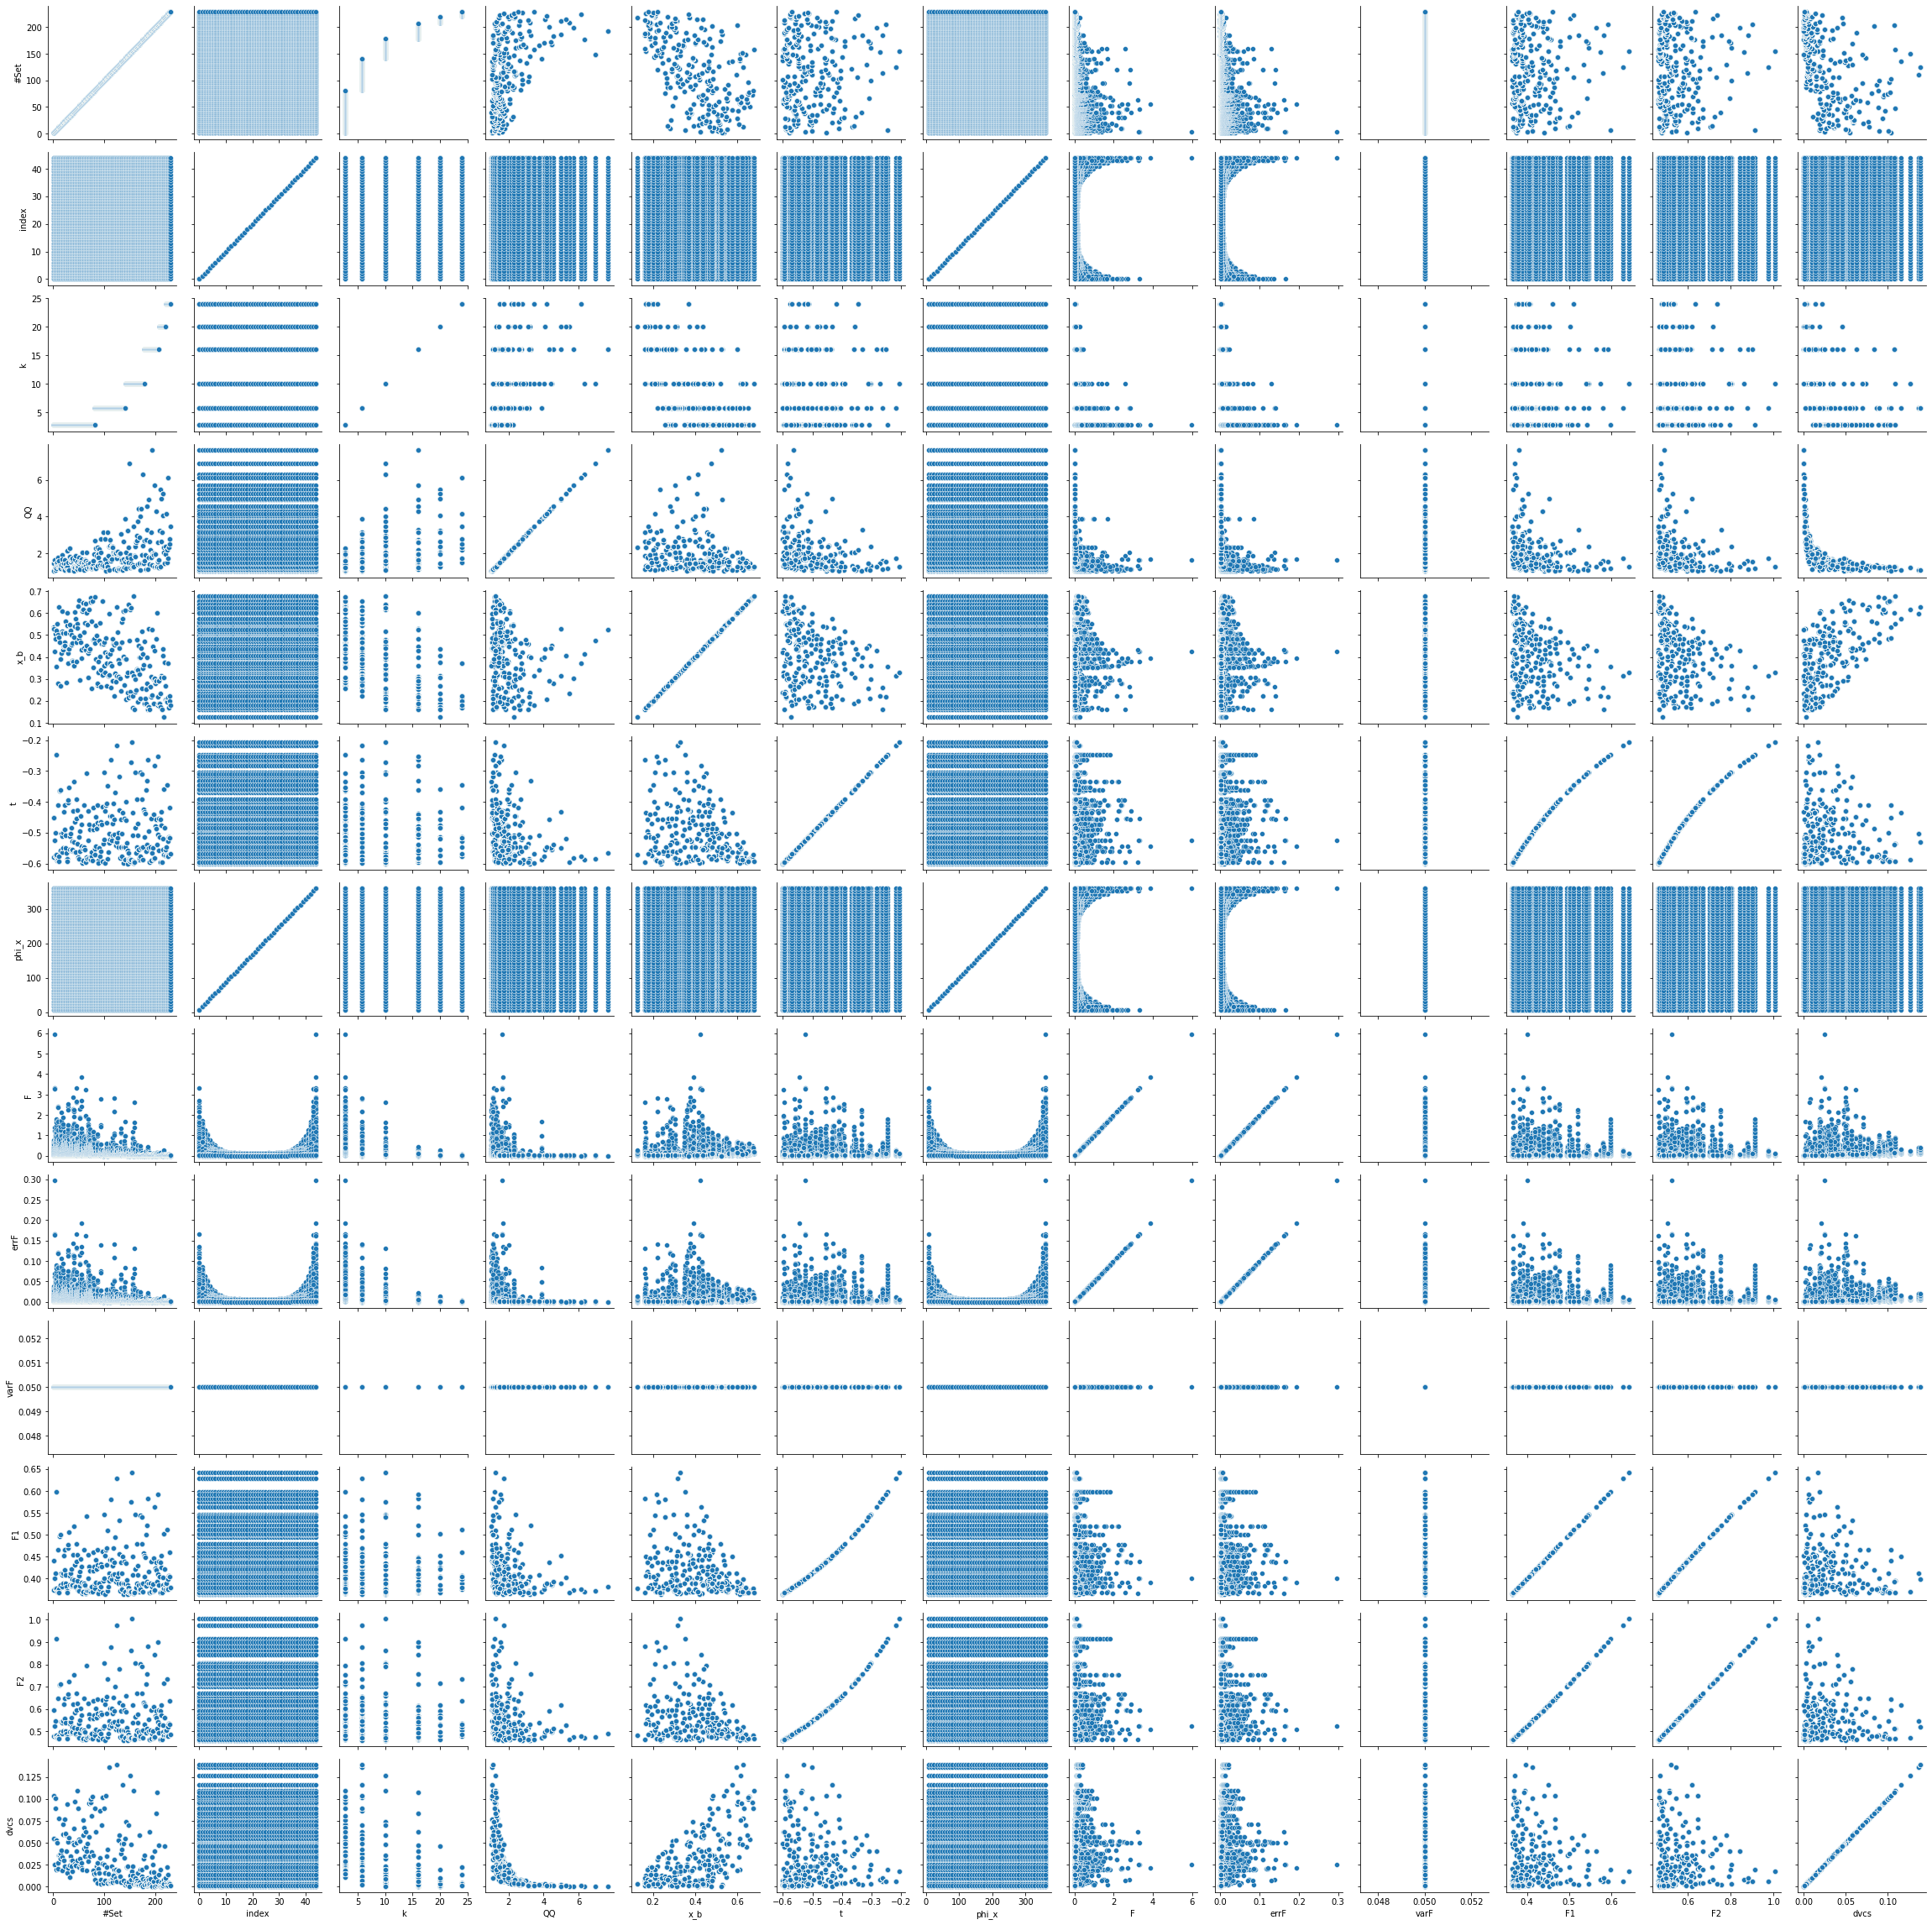

In [ ]:
g = sns.PairGrid(df);
g.map(sns.scatterplot);

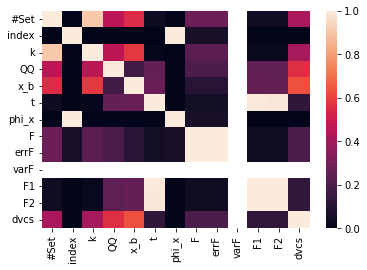

In [8]:
sns.heatmap(abs(df.corr()), xticklabels=df.columns.values, yticklabels=df.columns.values);

In [9]:
data = DvcsData(df)

In [10]:
kinematics = tf.keras.Input(shape=(4))
x1 = tf.keras.layers.Dense(100, activation="tanh")(kinematics)
x2 = tf.keras.layers.Dense(100, activation="tanh")(x1)
outputs = tf.keras.layers.Dense(4, activation="linear")(x2)
noncffInputs = tf.keras.Input(shape=(7))
#### phi, kin1, kin2, kin3, kin4, F1, F2 ####
total_FInputs = tf.keras.layers.concatenate([noncffInputs,outputs])
TotalF = TotalFLayer()(total_FInputs)

tfModel = tf.keras.Model(inputs=[kinematics, noncffInputs], outputs = TotalF, name="tfmodel")
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0000005, patience=25)

Model: "tfmodel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 100)          500         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 100)          10100       ['dense[0][0]']                  
                                                                                                  
 input_2 (InputLayer)           [(None, 7)]          0           []                               
                                                                                            

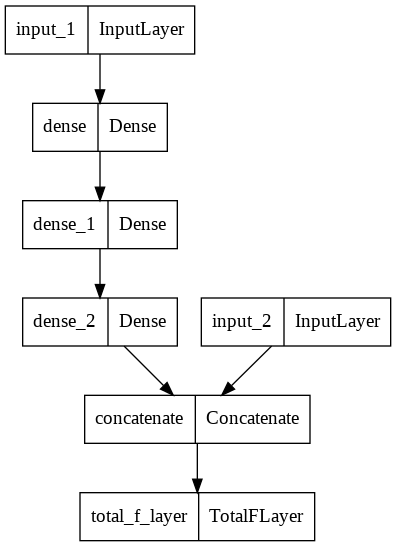

In [11]:
from keras.utils.vis_utils import plot_model
print(tfModel.summary())
plot_model(tfModel)

In [12]:
tfModel.compile(
    optimizer = tf.keras.optimizers.Adam(.0085),
    loss = tf.keras.losses.MeanSquaredError()
)

In [13]:
Wsave = tfModel.get_weights()

In [14]:
def get_total_error(experimental_values, expected_values):
  experimental_values, expected_values = list(experimental_values), list(expected_values)
  tot = 0
  for i,j in zip(experimental_values, expected_values):
    tot += abs(float(j) - float(i))
  return tot

def get_max_residual(x_values, experimental_values, expected_values):
  x_values, experimental_values, expected_values = list(x_values), list(experimental_values), list(expected_values)
  max = 0
  maxIndex = 0
  for n, (i,j) in enumerate(zip(experimental_values, expected_values)):
    residual = abs(float(j) - float(i))
    if residual > max:
      max = residual
      maxIndex = n
  return (x_values[n], max)

In [15]:
def F2VsPhi(dataframe,SetNum,xdat,cffs):
  plt.figure();
  f = BHDVCStf().curve_fit
  TempFvalSilces=dataframe[dataframe["#Set"]==SetNum]
  TempFvals=TempFvalSilces["F"]
  TempFvals_sigma=TempFvalSilces["errF"]
  temp_phi=TempFvalSilces["phi_x"]
  plt.errorbar(temp_phi,TempFvals,TempFvals_sigma,fmt='.',color='blue',label="Data")
  plt.xlim(0,368)
  temp_unit=(np.max(TempFvals)-np.min(TempFvals))/len(TempFvals)
  plt.ylim(np.min(TempFvals)-temp_unit,np.max(TempFvals)+temp_unit)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.legend(loc=4,fontsize=10,handlelength=3)
  plt.title("Local fit with data set #"+str(SetNum),fontsize=20)

  calculated_points = f(xdat,cffs)

  plt.plot(temp_phi, calculated_points, 'g--', label='fit')
  file_name = "plot_set_number_{}.png".format(SetNum)
  plt.show();
  return get_total_error(calculated_points, TempFvals), get_max_residual(temp_phi, calculated_points, TempFvals)

In [16]:
def F2VsPhi_noPlot(dataframe,SetNum,xdat,cffs):
  f = BHDVCStf().curve_fit
  TempFvalSilces=dataframe[dataframe["#Set"]==SetNum]
  TempFvals=TempFvalSilces["F"]
  TempFvals_sigma=TempFvalSilces["errF"]
  temp_phi=TempFvalSilces["phi_x"]

  calculated_points = f(xdat,cffs)

  return get_total_error(calculated_points, TempFvals), get_max_residual(temp_phi, calculated_points, TempFvals)

In [ ]:
total_errors = {}
total_residuals = {}

best_combination_errors = {0:(0,0,100), 1:(0,0,100), 2:(0,0,100), 3:(0,0,100), 4:(0,0,100)}

best_combination_residual = {0:(0,0,100), 1:(0,0,100), 2:(0,0,100), 3:(0,0,100), 4:(0,0,100)}

for epoch in np.arange(5,46,5):
  for batch in np.arange(1,6,1):
    by_set = []
    for i in range(5):
      setI = data.getSet(i, itemsInSet=45)

      tfModel.set_weights(Wsave)

      tfModel.fit([setI.Kinematics, setI.XnoCFF], setI.sampleY(), # one replica of samples from F vals
                            epochs=epoch, verbose=0, batch_size=batch, callbacks=[early_stopping_callback])
      
      
      cffs = cffs_from_globalModel(tfModel, setI.Kinematics, numHL=2)

      by_set.append(cffs)

      new_xdat = np.transpose(setI.XnoCFF.to_numpy(dtype=np.float32)) #NB: Could rewrite BHDVCS curve_fit to not require transposition

      # Avoid recalculating F-values from cffs when that is what the model is predicting already
      total_error, max_residual = F2VsPhi_noPlot(df,i+1,new_xdat,cffs);
      # print("total error of fit:", total_error)
      # print("maximum residual value of:", max_residual[1], "at phi=", max_residual[0])
      total_errors[(epoch, batch, i)] = total_error
      total_residuals[(epoch, batch, i)] = max_residual

      if best_combination_errors[i][2] > total_error:
        best_combination_errors[i] = (epoch, batch, total_error)

      if best_combination_residual[i][2] > max_residual[1]:
        best_combination_residual[i] = (epoch, batch, max_residual[1])

      print("done with", epoch, batch, "for set", i)

In [51]:
best_combination_errors

{0: (30, 3, 0.5726653116734028),
 1: (35, 1, 0.3289465048598288),
 2: (45, 4, 0.530460218609309),
 3: (35, 1, 0.3992546154359817),
 4: (40, 1, 0.3616771612799168)}

In [52]:
best_combination_residual

{0: (10, 2, 0.04663516117095945),
 1: (45, 3, 0.02680618048477168),
 2: (35, 3, 0.11723863098144527),
 3: (45, 5, 0.055080819484710664),
 4: (35, 1, 0.051511047908782914)}

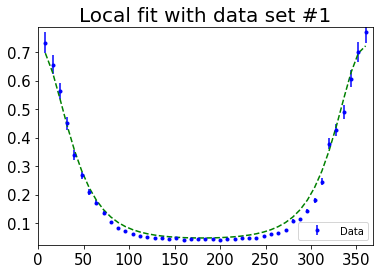

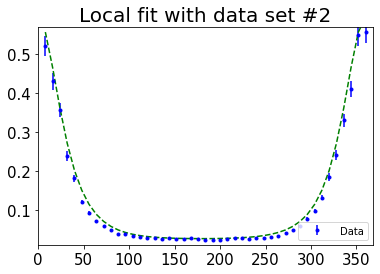

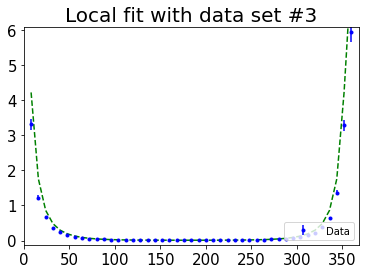

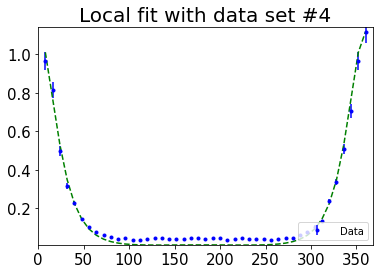

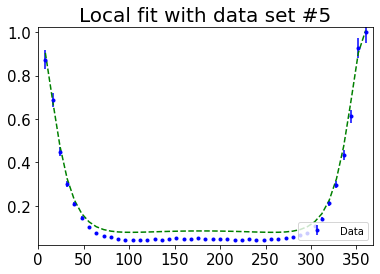

In [54]:
for i in range(5):
  setI = data.getSet(i, itemsInSet=45)

  tfModel.set_weights(Wsave)

  tfModel.fit([setI.Kinematics, setI.XnoCFF], setI.sampleY(), # one replica of samples from F vals
                        epochs=35, verbose=0, batch_size=1, callbacks=[early_stopping_callback])
  
  
  cffs = cffs_from_globalModel(tfModel, setI.Kinematics, numHL=2)

  by_set.append(cffs)

  new_xdat = np.transpose(setI.XnoCFF.to_numpy(dtype=np.float32)) #NB: Could rewrite BHDVCS curve_fit to not require transposition

  # Avoid recalculating F-values from cffs when that is what the model is predicting already
  total_error, max_residual = F2VsPhi(df,i+1,new_xdat,cffs);

In [ ]:
colors = ['red', 'blue', 'black', 'orange', 'lime']
fig, ax = plt.subplots(1, 5, figsize=(10*9, 7*5));

by_batch_size = np.ndarray((9,5), dtype=object)

for i in range(9):
  for j in range(5):
    by_batch_size[i][j] = []

for n,err in enumerate(total_errors.keys()):
  if by_batch_size[err[0]//5 - 1][err[1] - 1] == []:
    by_batch_size[err[0]//5 - 1][err[1] - 1] = [total_errors[err]]
  else:
    by_batch_size[err[0]//5 - 1][err[1] - 1] += [total_errors[err]]
  # by_batch_size[err[0]//5 - 1][err[1] - 1].scatter(err[2], total_errors[err], c = colors[err[2]], label="set #" + str(err[2]));
  # by_batch_size[err[0]//5 - 1][err[1] - 1].set_ylim(bottom = 0, top = max(total_errors.values()));
  # by_batch_size[err[0]//5 - 1][err[1] - 1].set_title("Batch Size of " + str(err[1]) + " With " + str(err[0]) + " Epochs")

# ax[8][4].legend();
by_batch_size

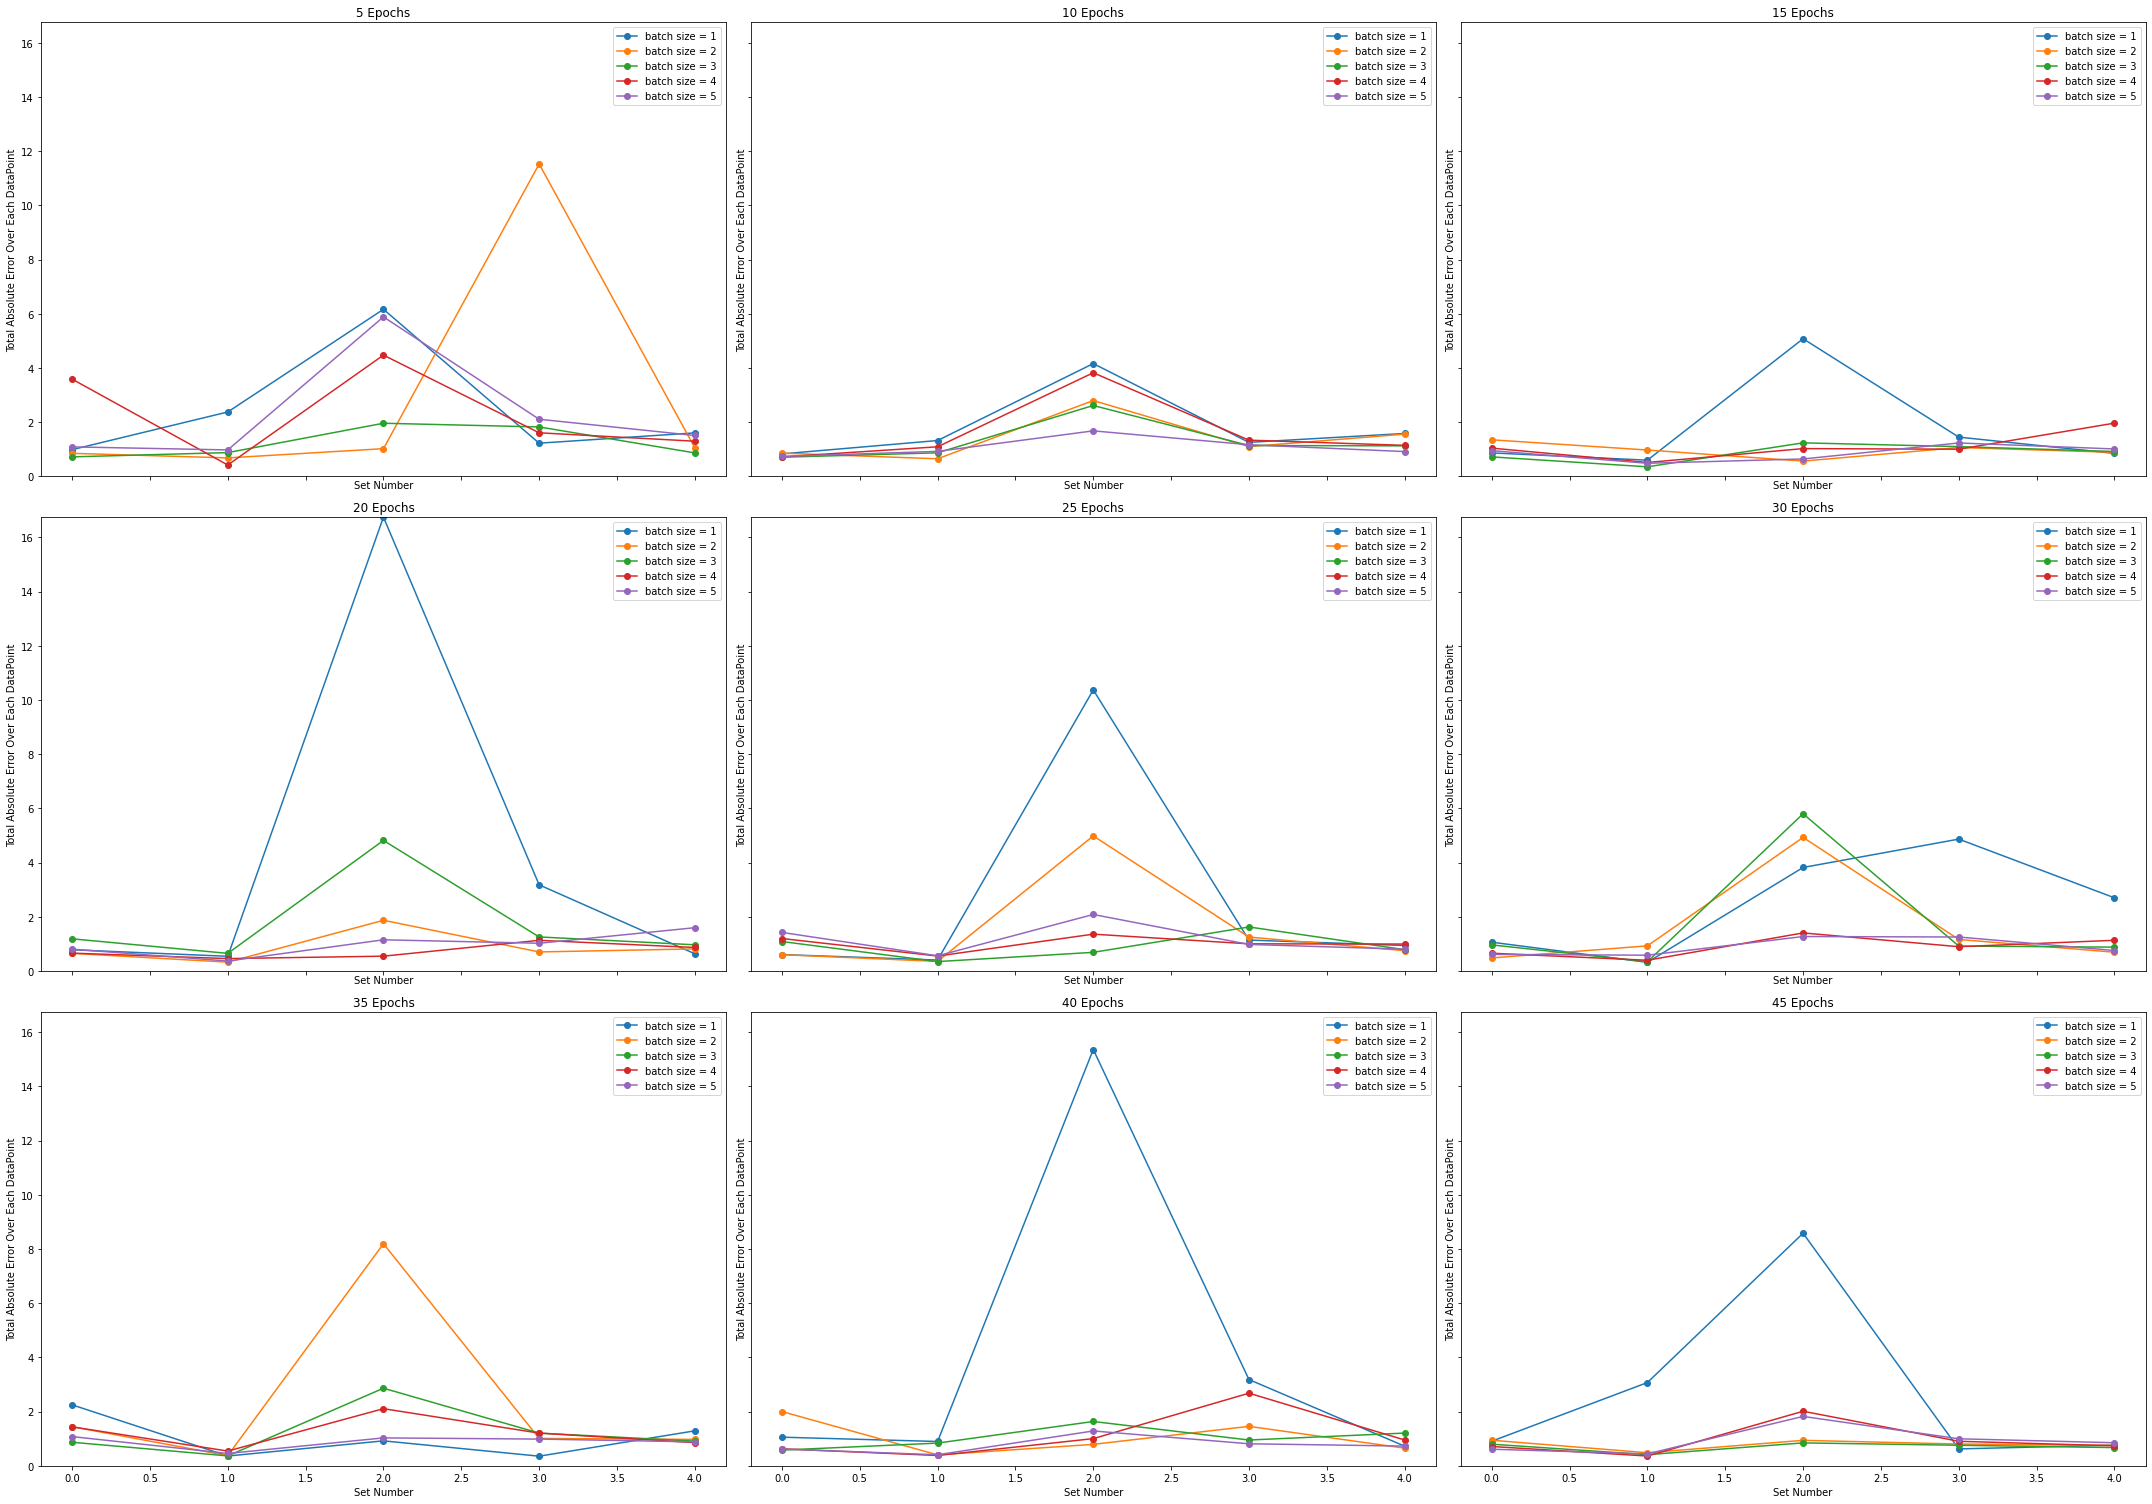

In [46]:
fig, ax = plt.subplots(3,3, figsize=(10*3,7*3), sharex=True, sharey=True);
for i in range(9):
  ax[i//3][i%3].set_title(str((i+1)*5) + " Epochs");
  ax[i//3][i%3].set_ylim(bottom = 0, top = max(total_errors.values()));
  ax[i//3][i%3].set_ylabel("Total Absolute Error Over Each DataPoint");
  ax[i//3][i%3].set_xlabel("Set Number");
  for j in range(5):
    ax[i//3][i%3].plot(by_batch_size[i][j], label="batch size = " + str(j + 1), marker='o');
    ax[i//3][i%3].legend(loc='top right');
plt.tight_layout();

In [18]:
find_best = 

{(5, 1, 0): 0.983853995301628,
 (5, 1, 1): 2.3747631967742917,
 (5, 1, 2): 6.163880677022744,
 (5, 1, 3): 1.2231673083213628,
 (5, 1, 4): 1.6034068650440214,
 (5, 2, 0): 0.8485549530665161,
 (5, 2, 1): 0.6805255312977315,
 (5, 2, 2): 1.0205731464113712,
 (5, 2, 3): 11.52572512084389,
 (5, 2, 4): 1.0501516372767923,
 (5, 3, 0): 0.7185309519242765,
 (5, 3, 1): 0.8756908612187385,
 (5, 3, 2): 1.9586929328064202,
 (5, 3, 3): 1.8233176042648558,
 (5, 3, 4): 0.8650761851613523,
 (5, 4, 0): 3.5870747103456493,
 (5, 4, 1): 0.4179434916586635,
 (5, 4, 2): 4.472797194240284,
 (5, 4, 3): 1.6065430656093125,
 (5, 4, 4): 1.2960989855604765,
 (5, 5, 0): 1.086340861981058,
 (5, 5, 1): 0.9745008945029258,
 (5, 5, 2): 5.883407435319613,
 (5, 5, 3): 2.10670778965497,
 (5, 5, 4): 1.5071722983948228,
 (10, 1, 0): 0.8279524924837588,
 (10, 1, 1): 1.3214324868553162,
 (10, 1, 2): 4.160559544670392,
 (10, 1, 3): 1.2537719649643897,
 (10, 1, 4): 1.5813902996114728,
 (10, 2, 0): 0.8556184681620597,
 (10, 2, 1)

In [ ]:
newdf = pd.DataFrame(by_set)
newdf

,0,1,2,3
0,2.334997,-0.893499,0.417656,0.020302
1,2.796165,-1.083397,0.249943,0.006422
2,1.052445,-4.766287,7.252744,0.493498
3,3.514519,11.976687,1.511317,0.085163
4,2.096832,0.605659,1.966028,0.081438


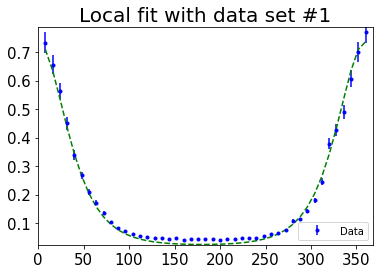

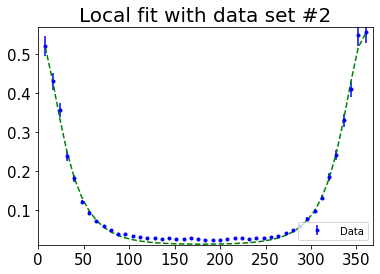

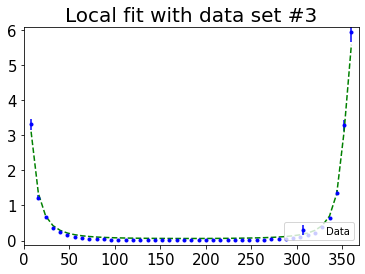

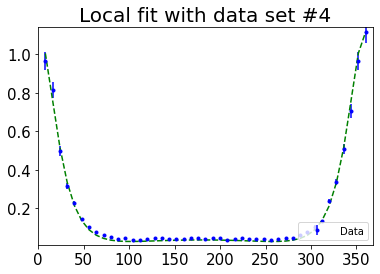

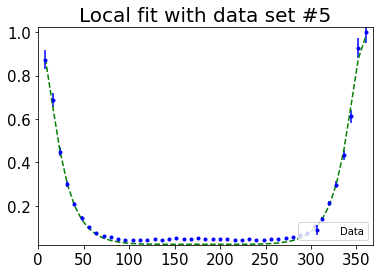

In [ ]:
by_set = []
for i in range(5):
  setI = data.getSet(i, itemsInSet=45)

  tfModel.set_weights(Wsave)

  tfModel.fit([setI.Kinematics, setI.XnoCFF], setI.sampleY(), # one replica of samples from F vals
                        epochs=15*5, verbose=0, batch_size=5, callbacks=[early_stopping_callback])
  
  
  cffs = cffs_from_globalModel(tfModel, setI.Kinematics, numHL=2)

  by_set.append(cffs)

  new_xdat = np.transpose(setI.XnoCFF.to_numpy(dtype=np.float32)) #NB: Could rewrite BHDVCS curve_fit to not require transposition

  # Avoid recalculating F-values from cffs when that is what the model is predicting already
  F2VsPhi(df,i+1,new_xdat,cffs);